<a href="https://colab.research.google.com/github/martinuncal/Coderhouse/blob/main/Dataset_Aibnb_Uncal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primera Entrega | Trabajo Final | Coderhouse: Uncal, Juan Martin**

Fuente de Datos: Kaggle (Airbnb Europa)
Se compone de 20 cvs con los datos de las principales capitales de Europa

El proyecto se enfoca en el análisis del costo de las propiedades de Airbnb en las principales ciudades de Europa. El dataset utilizado fue obtenido de una base de datos, que contiene información detallada sobre diversas características de las propiedades, como el tipo de habitación, la capacidad de personas, la ubicación geográfica, las valoraciones de los huéspedes, entre otros.

El objetivo principal del proyecto es desarrollar modelos de regresión y clasificación para predecir los precios y valoraciones de las propiedades de Airbnb, respectivamente. Para ello, se aplican técnicas de selección de características utilizando Recursive Feature Elimination (RFE) y se utilizan algoritmos como Random Forest para construir los modelos.

El análisis se centra en evaluar el rendimiento de los modelos en términos de su capacidad predictiva y la precisión de las características seleccionadas. Además, se calculan métricas como el MAE (Error Absoluto Medio) para evaluar la precisión de las predicciones de precios y el recall para evaluar el rendimiento del modelo de clasificación.

El proyecto proporciona una visión general de los factores que influyen en el costo de las propiedades de Airbnb en Europa y ofrece una perspectiva sobre la capacidad de los modelos para predecir los precios y valoraciones de estas propiedades. Esto puede ser útil para entender el mercado inmobiliario de alquileres a corto plazo y tomar decisiones informadas en la industria turística y hotelera.


El objetivo de este análisis es proporcionar información sobre las propiedades de Airbnb en las principales ciudades de Europa, centrándose en dos aspectos principales: la relación entre los precios y la capacidad de las propiedades, y la relación entre los precios y la puntuación de satisfacción de los huéspedes.

**Problema Comercial:**
El problema comercial que se aborda es entender cómo se relacionan los precios de las propiedades de Airbnb con su capacidad y la satisfacción de los huéspedes. Esto puede ayudar a los propietarios y administradores de propiedades a tomar decisiones informadas sobre los precios, así como a los viajeros a tener una idea de qué esperar en términos de relación calidad-precio.

**Contexto Analítico:**
El contexto analítico se centra en el análisis de las bases de datos de Airbnb en las principales ciudades de Europa. Se recopilarán datos sobre las propiedades, incluyendo su capacidad (número de huéspedes que pueden alojar) y su puntuación de satisfacción. Además, se obtendrán datos sobre los precios de estas propiedades. El análisis se realizará utilizando técnicas de ciencia de datos para identificar patrones y tendencias en los datos.

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/AirbnbEurope'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/AirbnbEurope


In [ ]:
import pandas as pd
import glob

path = '/content/gdrive/MyDrive/AirbnbEurope'
all_files = glob.glob(path + "/*.csv")

data_frames = []

for file in all_files:
    df = pd.read_csv(file)
    data_frames.append(df)


In [ ]:
import matplotlib.pyplot as plt
!pip install pingouin
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests
import pandas as pd
import numpy as np


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=f15a29ebf5b74fe674439322eb3169083d141e301476cced3b59f1260b2b5cbf
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pandas as pd

print("Airbnb paises por analizar")
symbol_data_to_load = ['amsterdam_weekdays.csv', 'amsterdam_weekends.csv', 'athens_weekdays.csv', 'athens_weekends.csv', 'barcelona_weekdays.csv', 'barcelona_weekends.csv', 'berlin_weekdays.csv', 'berlin_weekends.csv', 'budapest_weekdays.csv', 'budapest_weekends.csv', 'london_weekdays.csv', 'london_weekends.csv', 'paris_weekdays.csv', 'paris_weekends.csv', 'lisbon_weekdays.csv', 'lisbon_weekends.csv', 'rome_weekdays.csv', 'rome_weekends.csv', 'vienna_weekdays.csv', 'vienna_weekends.csv']
list_of_df = []

print(" --- Inicio de Loop --- ")
for i in symbol_data_to_load:
    print("Procesando Pais: " + i)
    temp_df = pd.read_csv(i, sep=',')
    temp_df['Country'] = i[:-4]
    list_of_df.append(temp_df)


print("Agregando la data")
agg_df = pd.concat(list_of_df, axis=0)

print(agg_df.shape)

print("Head del DataFrame agg_df: ")
agg_df.head()


Airbnb paises por analizar
 --- Inicio de Loop --- 
Procesando Pais: amsterdam_weekdays.csv
Procesando Pais: amsterdam_weekends.csv
Procesando Pais: athens_weekdays.csv
Procesando Pais: athens_weekends.csv
Procesando Pais: barcelona_weekdays.csv
Procesando Pais: barcelona_weekends.csv
Procesando Pais: berlin_weekdays.csv
Procesando Pais: berlin_weekends.csv
Procesando Pais: budapest_weekdays.csv
Procesando Pais: budapest_weekends.csv
Procesando Pais: london_weekdays.csv
Procesando Pais: london_weekends.csv
Procesando Pais: paris_weekdays.csv
Procesando Pais: paris_weekends.csv
Procesando Pais: lisbon_weekdays.csv
Procesando Pais: lisbon_weekends.csv
Procesando Pais: rome_weekdays.csv
Procesando Pais: rome_weekends.csv
Procesando Pais: vienna_weekdays.csv
Procesando Pais: vienna_weekends.csv
Agregando la data
(51707, 21)
Head del DataFrame agg_df: 


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,Country
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays


In [ ]:
dft = agg_df[['Country','realSum', 'guest_satisfaction_overall', 'cleanliness_rating','bedrooms', 'person_capacity']]
dft.head()


,Country,realSum,guest_satisfaction_overall,cleanliness_rating,bedrooms,person_capacity
0,amsterdam_weekdays,194.033698,93.0,10.0,1,2.0
1,amsterdam_weekdays,344.245776,85.0,8.0,1,4.0
2,amsterdam_weekdays,264.101422,87.0,9.0,1,2.0
3,amsterdam_weekdays,433.529398,90.0,9.0,2,4.0
4,amsterdam_weekdays,485.552926,98.0,10.0,1,2.0


# **Descripción de las columnas**

**realSum**	The total price of the Airbnb listing. (Numeric) Precio de referencia (Númerico)

**room_type	** Tipo de cuarto ofrecido (ej privado, compartido) (Categoria)

**room_shared**	Sí el dormitorio es compartido o no (Booleano)

**room_private**	Sí el dormitorio es privado o no (Booleano)

**person_capacity**	Maximo de personas que se hospedan (Numerico)

**host_is_superhost**	Sí el usuario airbnb es "superanfitrio" o no (Booleano)

**multi**	Sí la propiedad posee multiples espacios (Booleano)

**biz**	Sí la propiedad es apta para viaje de negocios (Booleano)

**cleanliness_rating**	Puntuación de calidad de limpieza (Numerico)

**guest_satisfaction_overall**	Puntuación por satisfacción de la persona que se hospeda (Numerico)

**bedrooms**	Cantidad de cuartos que dispone la propiedad (Numerico)

**dist**	Distancia al centro de la ciudad (Numerico)

**metro_dist**	Distancia al estación de metro mas cercana (Numerico)

In [ ]:
data.info()

In [ ]:
sns.boxplot(x='bedrooms', y = 'realSum', data = data)
plt.title("Precio vs Cantidad de Dormitorios")


# **Analisis de precio vs cantidad de dormitorios**

Se visualiza que la tendencia es alcista en cuestión de precios a medida que la propiedad dispone de mas cuartos, pero la demanda de propiedades demuestra que las propiedades de hasta 4 dormitorios son mas caras que incluso las de hasta 5 dormitorios

In [ ]:
from vega_datasets import data
df = agg_df

factors = ['realSum', 'guest_satisfaction_overall', 'cleanliness_rating',
           'bedrooms', 'person_capacity']
new_max = 100
new_min = 0
new_range = new_max - new_min

factor_stats = {}
for factor in factors:
    factor_stats[factor] = {
        'max_val': df[factor].max(),
        'min_val': df[factor].min(),
        'val_range': df[factor].max() - df[factor].min()
    }
dft.rename(columns={
    'realSum': 'Precio Promedio por Mes',
    'guest_satisfaction_overall': 'Nivel de Satisfacción General',
    'cleanliness_rating': 'Puntuación de Limpieza',
    'bedrooms': 'Cantidad de Dormitorios',
    'person_capacity': 'Capacidad de Huespedes'
}, inplace=True)

dft.head()


<ipython-input-9-1f0f6cb0c715>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft.rename(columns={


,Country,Precio Promedio por Mes,Nivel de Satisfacción General,Puntuación de Limpieza,Cantidad de Dormitorios,Capacidad de Huespedes
0,amsterdam_weekdays,194.033698,93.0,10.0,1,2.0
1,amsterdam_weekdays,344.245776,85.0,8.0,1,4.0
2,amsterdam_weekdays,264.101422,87.0,9.0,1,2.0
3,amsterdam_weekdays,433.529398,90.0,9.0,2,4.0
4,amsterdam_weekdays,485.552926,98.0,10.0,1,2.0


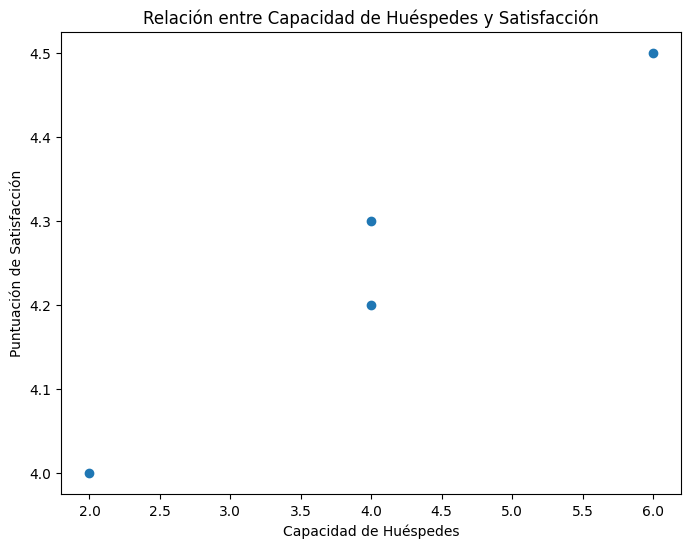

In [ ]:
import matplotlib.pyplot as plt

capacidad_huespedes = [4, 6, 2, 4]
puntuacion_satisfaccion = [4.2, 4.5, 4.0, 4.3]

plt.figure(figsize=(8, 6))
plt.scatter(capacidad_huespedes, puntuacion_satisfaccion)
plt.xlabel('Capacidad de Huéspedes')
plt.ylabel('Puntuación de Satisfacción')
plt.title('Relación entre Capacidad de Huéspedes y Satisfacción')
plt.show()

*Lo que se analiza en el grafico es que el nivel de satisfaccion del cliente aumenta en propiedades de mayor capacidad dado que en muchas de estas las comodidades y el lujo es mayor en la relacion costo-beneficio por persona*

**Motivación y audiencia:**
Este análisis se centra en las propiedades de Airbnb en las principales ciudades de Europa, con el objetivo de comprender la relación entre el precio, la capacidad de alojamiento y el nivel de satisfacción de los clientes. La motivación detrás de este análisis es proporcionar información valiosa tanto para los propietarios y administradores de propiedades de Airbnb, como para los viajeros interesados en alquilar propiedades en Europa. Los propietarios y administradores podrán tomar decisiones informadas sobre los precios y la capacidad de sus propiedades, mientras que los viajeros podrán tener una idea de qué esperar en términos de calidad y relación precio-capacidad.

**Preguntas e Hipótesis:**
1. ¿Existe una relación entre el precio y la capacidad de alojamiento de las propiedades de Airbnb en las principales ciudades de Europa? Se plantea la hipótesis de que las propiedades con mayor capacidad tienden a tener precios más altos.

2. ¿Existe una relación entre el precio y el nivel de satisfacción de los clientes en Airbnb? Se plantea la hipótesis de que las propiedades con precios más altos tienen una mayor puntuación de satisfacción por parte de los huéspedes.

3. ¿Existen diferencias significativas en términos de precios, capacidad y nivel de satisfacción entre las diferentes ciudades de Europa? Se plantea la hipótesis de que puede haber variaciones en estas variables entre ciudades.

**Análisis Exploratorio de los datos**:
Durante el análisis exploratorio de los datos, se llevarán a cabo las siguientes tareas:

1. Limpieza de datos: Se realizará una limpieza de los datos para eliminar valores faltantes o inconsistentes, y se convertirán los formatos de datos en el formato adecuado para su análisis.

2. Estadísticas descriptivas: Se calcularán estadísticas descriptivas para obtener una visión general de los datos, como el rango, la media, la mediana y la desviación estándar de los precios, la capacidad y la puntuación de satisfacción.

3. Visualización de datos: Se crearán gráficos y visualizaciones para examinar la distribución de los precios, la capacidad y la puntuación de satisfacción. Se utilizarán histogramas, diagramas de dispersión y gráficos de barras para visualizar las relaciones entre estas variables.

4. Análisis de correlación: Se calculará la matriz de correlación para evaluar la relación entre el precio, la capacidad y la puntuación de satisfacción. Se explorarán las correlaciones positivas o negativas entre estas variables.

5. Comparación entre ciudades: Se compararán los precios, la capacidad y la satisfacción entre diferentes ciudades de Europa mediante gráficos o tablas. Esto permitirá identificar patrones y posibles diferencias significativas entre las ciudades.

*El análisis exploratorio de los datos proporcionará información valiosa sobre las propiedades de Airbnb en las principales ciudades de Europa, permitiendo a los propietarios, administradores y viajeros comprender mejor la relación entre el precio, la capacidad y el nivel de satisfacción.*

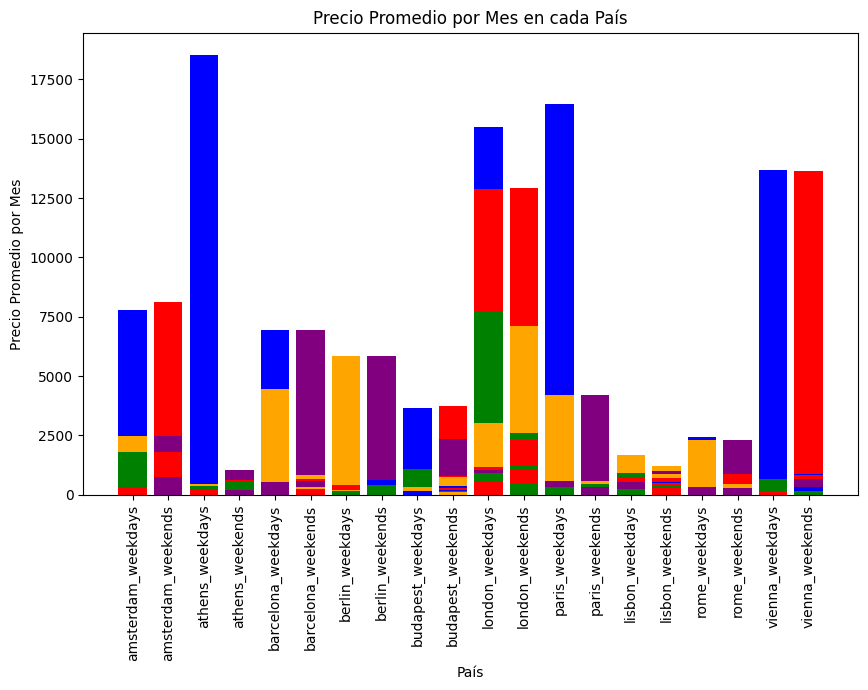

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

colores = ['blue', 'green', 'red', 'orange', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(agg_df['Country'], agg_df['realSum'], color=colores)
plt.xlabel('País')
plt.ylabel('Precio Promedio por Mes')
plt.title('Precio Promedio por Mes en cada País')
plt.xticks(rotation=90)
plt.show()




En base a las consigna de la entrega determine que utilizare las siguiente perspectivas de analisis

En el caso de Metodo de Feature Selection a fines de reducir las dimensiones del dataset utilizare un algoritmo de Recursive Feature Elimination para eliminar las carecteristicas menos relevantes de la base de datos.

En el del algoritmo de regresión, optare por un modelo de Regresion Lineal para encontrar mas rapido y reducir los valores de los precios a fin de tener con mayor exactitud los mejores precios vs las valoraciones de satisfaccion del cliente.
Usando tambien un modelo Regresion de albol de bosque para dividir las características en paises del dataset del Aibnbnb y realiza una predicción basada en la región a la que pertenece una instancia.

En el caso de la clasificacion optare por un algoritmo de Bosque Aleatorio para que trabaje en paralelo y realizar una calificacion promediando las predicciones de cada archivo del dataset y realizar una comparativa general de los archivos individuales.

Metricas para validar el modelo:

Recall: Lo utilizare para medir la proporción de instancias positivas clasificadas correctamente respecto al total de instancias positivas.
Error absoluto medio (MAE): Para calcular el promedio de las diferencias absolutas entre las predicciones y los valores reales.

Conclusion a las que quiero llegar:

Al analizar las métricas obtenidas y compararlas con las expectativas iniciales establecidas para el proyecto de Airbnb y el dataset de propiedades en Europa, podemos evaluar el rendimiento y la precisión de los modelos de regresión y clasificación implementados. Esta evaluación nos permitirá determinar si los modelos cumplen con los objetivos establecidos, especialmente en términos de predecir con precisión los precios y clasificaciones de las propiedades.

Además, al identificar las características más importantes seleccionadas a través del proceso de "Feature Selection" y examinar su relación con las predicciones generadas por los modelos, para obtener una comprensión más profunda de las variables que tienen un impacto significativo en los resultados obtenidos.

In [ ]:
dataset= agg_df

In [ ]:
print(dataset.columns)

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'Country'],
      dtype='object')


In [ ]:
  import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

dataset = agg_df

print("Resultados de los modelos aplicados")

X = dataset.drop(['realSum', 'guest_satisfaction_overall'], axis=1)
y_precio = dataset['realSum']
y_valoracion = dataset['guest_satisfaction_overall']

categorical_columns = ['room_type', 'Country']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
X_encoded.columns = [f"{col}_{category}" for col, categories in zip(categorical_columns, encoder.categories_) for category in categories]
X_encoded.index = X.index
X = pd.concat([X.drop(categorical_columns, axis=1), X_encoded], axis=1)

estimador_regresion = LinearRegression()
rfe_regresion = RFE(estimator=estimador_regresion, n_features_to_select=5)
X_regresion = rfe_regresion.fit_transform(X, y_precio)

estimador_clasificacion = RandomForestClassifier()
rfe_clasificacion = RFE(estimator=estimador_clasificacion, n_features_to_select=5)
X_clasificacion = rfe_clasificacion.fit_transform(X, y_valoracion)


modelo_regresion = LinearRegression()
modelo_regresion.fit(X_regresion, y_precio)


modelo_clasificacion = RandomForestClassifier()
modelo_clasificacion.fit(X_clasificacion, y_valoracion)


predicciones_regresion = modelo_regresion.predict(X_regresion)
predicciones_clasificacion = modelo_clasificacion.predict(X_clasificacion)

accuracy = accuracy_score(y_valoracion, predicciones_clasificacion)
mae = mean_absolute_error(y_precio, predicciones_regresion)

print("Métricas de validación:")
print("Accuracy:", accuracy)
print("MAE:", mae)

caracteristicas_regresion = X.columns[rfe_regresion.support_]
caracteristicas_clasificacion = X.columns[rfe_clasificacion.support_]

print("Características seleccionadas para regresión:")
print(caracteristicas_regresion)

print("Características seleccionadas para clasificación:")
print(caracteristicas_clasificacion)


Resultados de los modelos aplicados


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Métricas de validación:
Accuracy: 0.9999613205175315
MAE: 130.52879474671533
Características seleccionadas para regresión:
Index(['Country_amsterdam_weekdays', 'Country_amsterdam_weekends',
       'Country_london_weekends', 'Country_paris_weekdays',
       'Country_paris_weekends'],
      dtype='object')
Características seleccionadas para clasificación:
Index(['dist', 'metro_dist', 'attr_index', 'rest_index', 'lng'], dtype='object')


# Entrega 27. - Data Acquistion II

In [ ]:
import requests

url = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current_weather=true&hourly=temperature_2m,relativehumidity_2m,windspeed_10m"

response = requests.get(url)

if response.status_code == 200:

    data = response.json()

    current_weather = data["current_weather"]
    current_time = current_weather["time"]
    temperature = current_weather["temperature"]
    weather_code = current_weather["weathercode"]
    windspeed = current_weather["windspeed"]
    winddirection = current_weather["winddirection"]

    hourly_data = data["hourly"]
    hourly_time = hourly_data["time"]
    windspeed_10m = hourly_data["windspeed_10m"]
    temperature_2m = hourly_data["temperature_2m"]
    relativehumidity_2m = hourly_data["relativehumidity_2m"]

else:
    print("Error al obtener los datos del clima. Código de estado:", response.status_code)
if response.status_code == 200:
    print("La API funciona correctamente.")
else:
    print("Error al conectar con la API. Código de estado:", response.status_code)

    # Obtener la cantidad de datos, filas y columnas en el JSON
num_data = len(data)
num_rows = len(data["hourly"]["time"])
num_cols = len(data["hourly"]) - 1  # Restar 1 para excluir la clave "time"

# Mostrar los resultados
print("Cantidad de datos:", num_data)
print("Cantidad de filas:", num_rows)
print("Cantidad de columnas:", num_cols)

La API funciona correctamente.
Cantidad de datos: 10
Cantidad de filas: 168
Cantidad de columnas: 3


In [ ]:
import requests

url = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current_weather=true&hourly=temperature_2m,relativehumidity_2m,windspeed_10m"
response = requests.get(url)
data = response.json()

print("Datos meteorológicos actuales:")
current_weather = data["current_weather"]
print("Fecha y hora:", current_weather["time"])
print("Temperatura:", current_weather["temperature"])
print("Código de clima:", current_weather["weathercode"])
print("Velocidad del viento:", current_weather["windspeed"])
print("Dirección del viento:", current_weather["winddirection"])

print("\nDatos horarios:")
hourly_data = data["hourly"]
print("Fechas y horas:", hourly_data["time"])
print("Velocidad del viento a 10m:", hourly_data["windspeed_10m"])
print("Temperatura a 2m:", hourly_data["temperature_2m"])
print("Humedad relativa a 2m:", hourly_data["relativehumidity_2m"])


Datos meteorológicos actuales:
Fecha y hora: 2023-06-18T13:00
Temperatura: 25.5
Código de clima: 2
Velocidad del viento: 3.3
Dirección del viento: 354.0

Datos horarios:
Fechas y horas: ['2023-06-18T00:00', '2023-06-18T01:00', '2023-06-18T02:00', '2023-06-18T03:00', '2023-06-18T04:00', '2023-06-18T05:00', '2023-06-18T06:00', '2023-06-18T07:00', '2023-06-18T08:00', '2023-06-18T09:00', '2023-06-18T10:00', '2023-06-18T11:00', '2023-06-18T12:00', '2023-06-18T13:00', '2023-06-18T14:00', '2023-06-18T15:00', '2023-06-18T16:00', '2023-06-18T17:00', '2023-06-18T18:00', '2023-06-18T19:00', '2023-06-18T20:00', '2023-06-18T21:00', '2023-06-18T22:00', '2023-06-18T23:00', '2023-06-19T00:00', '2023-06-19T01:00', '2023-06-19T02:00', '2023-06-19T03:00', '2023-06-19T04:00', '2023-06-19T05:00', '2023-06-19T06:00', '2023-06-19T07:00', '2023-06-19T08:00', '2023-06-19T09:00', '2023-06-19T10:00', '2023-06-19T11:00', '2023-06-19T12:00', '2023-06-19T13:00', '2023-06-19T14:00', '2023-06-19T15:00', '2023-06-19T1

Descripcion de la API

La API de Open Meteo proporciona una variedad de datos meteorológicos para la ubicación geográfica especificada. Los datos disponibles en la API incluyen:

Datos meteorológicos actuales:

time: La fecha y hora en la que se registraron los datos meteorológicos.
temperature: La temperatura actual en grados Celsius.

weathercode: Un código que representa las condiciones meteorológicas actuales.
windspeed: La velocidad del viento en metros por segundo.

winddirection: La dirección del viento en grados.

Datos horarios:

time: Una lista de fechas y horas para las cuales se proporcionan datos horarios.

windspeed_10m: La velocidad del viento a 10 metros sobre el suelo en metros por segundo.

temperature_2m: La temperatura a 2 metros sobre el suelo en grados Celsius.

relativehumidity_2m: La humedad relativa a 2 metros sobre el suelo en porcentaje.

In [ ]:
import requests
import pandas as pd
url = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current_weather=true&hourly=temperature_2m,relativehumidity_2m,windspeed_10m"
response = requests.get(url)
data = response.json()
current_weather = data["current_weather"]
current_data = pd.DataFrame(current_weather, index=[0])
hourly_data = data["hourly"]
hourly_df = pd.DataFrame(hourly_data)
print("Datos meteorológicos actuales:")
print(current_data)

print("\nDatos horarios:")
print(hourly_df)


Datos meteorológicos actuales:
   temperature  windspeed  winddirection  weathercode  is_day  \
0         25.5        8.3          342.0            2       1   

               time  
0  2023-06-18T13:00  

Datos horarios:
                 time  temperature_2m  relativehumidity_2m  windspeed_10m
0    2023-06-18T00:00            14.3                   99            2.6
1    2023-06-18T01:00            13.6                  100            1.8
2    2023-06-18T02:00            13.2                  100            2.1
3    2023-06-18T03:00            12.8                  100            1.8
4    2023-06-18T04:00            13.2                   98            1.8
..                ...             ...                  ...            ...
163  2023-06-24T19:00            20.8                   64           10.0
164  2023-06-24T20:00            19.7                   71            6.9
165  2023-06-24T21:00            18.8                   77            4.7
166  2023-06-24T22:00            18.2

In [ ]:
import requests
import pandas as pd

url = "https://archive-api.open-meteo.com/v1/era5?latitude=52.52&longitude=13.41&start_date=2021-01-01&end_date=2021-12-31&hourly=temperature_2m"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data["hourly"])
df["time"] = pd.to_datetime(df["time"])

print(df)


                    time  temperature_2m
0    2021-01-01 00:00:00             1.1
1    2021-01-01 01:00:00             0.9
2    2021-01-01 02:00:00             0.7
3    2021-01-01 03:00:00             0.6
4    2021-01-01 04:00:00             0.6
...                  ...             ...
8755 2021-12-31 19:00:00            11.1
8756 2021-12-31 20:00:00            11.1
8757 2021-12-31 21:00:00            11.1
8758 2021-12-31 22:00:00            11.2
8759 2021-12-31 23:00:00            11.2

[8760 rows x 2 columns]


In [6]:
import requests

url = "https://weatherapi-com.p.rapidapi.com/current.json"

querystring = {"q": "53.1,-0.13"}

headers = {
    "X-RapidAPI-Key": "57caa1f7d4msh40db8a83b80b003p1b92dfjsn31dfdc0b2c70",
    "X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

if response.status_code == 200:
    data = response.json()
    print(data)

    num_data = len(data)
    num_rows = len(data.keys())
    num_cols = len(data[list(data.keys())[0]])

    print("Cantidad de datos:", num_data)
    print("Cantidad de filas:", num_rows)
    print("Cantidad de columnas:", num_cols)

else:
    print("Error en la solicitud:", response.status_code)



{'location': {'name': 'Boston', 'region': 'Lincolnshire', 'country': 'United Kingdom', 'lat': 53.1, 'lon': -0.13, 'tz_id': 'Europe/London', 'localtime_epoch': 1687188405, 'localtime': '2023-06-19 16:26'}, 'current': {'last_updated_epoch': 1687187700, 'last_updated': '2023-06-19 16:15', 'temp_c': 25.0, 'temp_f': 77.0, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 11.9, 'wind_kph': 19.1, 'wind_degree': 230, 'wind_dir': 'SW', 'pressure_mb': 1009.0, 'pressure_in': 29.8, 'precip_mm': 0.2, 'precip_in': 0.01, 'humidity': 47, 'cloud': 25, 'feelslike_c': 26.1, 'feelslike_f': 79.0, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 5.0, 'gust_mph': 15.2, 'gust_kph': 24.5}}
Cantidad de datos: 2
Cantidad de filas: 2
Cantidad de columnas: 8
